In [29]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from keras.applications.resnet50 import ResNet50
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf




In [33]:
base_directory = "/Users/iswetha/ironhack/Landmark_Recognition_Project/image_downloads/"
train_directory = '{}train/'.format(base_directory)
test_directory = '{}test/'.format(base_directory)

batch_size = 32
img_height = 224
img_width = 224

# Taking the images from the local directory and spliting 80% for training and 20% for validation
train_generator = tf.keras.preprocessing.image_dataset_from_directory(
  train_directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

validation_generator = tf.keras.preprocessing.image_dataset_from_directory(
  train_directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 19202 files belonging to 13 classes.
Using 15362 files for training.
Found 19202 files belonging to 13 classes.
Using 3840 files for validation.


In [34]:
# Finding the classes for my model.
class_names = train_generator.class_names
print(class_names)

['10900', '13526', '1553', '2061', '2743', '4352', '5376', '5554', '6051', '6696', '8063', '9633', '9779']


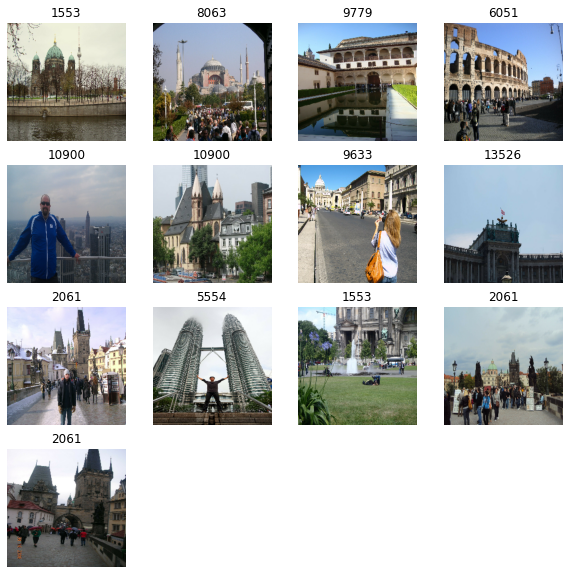

In [35]:
# Visualizing the data
plt.figure(figsize=(10, 10))

for images, labels in train_generator.take(1):
    
    for i in range(13):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [36]:
for image_batch, labels_batch in train_generator:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(32, 224, 224, 3)
(32,)


In [ ]:
# Number of classes used for my model
num_classes = 13

In [ ]:
# Building Model using ResNet50 Pre trained model as the base layer
my_new_model = Sequential()
my_new_model.add(ResNet50(include_top = False, weights = 'imagenet', pooling = 'avg'))
my_new_model.add(Dense(128, activation = 'relu'))
my_new_model.add(Dense(128, activation = 'relu'))
my_new_model.add(Dense(128, activation = 'softmax'))
my_new_model.layers[0].trainable = False

In [ ]:
# Compiling the model with optimizer 'adam' and loss function as sparse-category-crossentropy
my_new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the model with the training data
with_premodel = my_new_model.fit(train_generator,
        steps_per_epoch=len(train_generator),
        epochs=10,
        validation_data=validation_generator,
        validation_steps=len(validation_generator))

In [37]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [38]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_generator.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = validation_generator.cache().prefetch(buffer_size=AUTOTUNE)


In [39]:
# Building model without using any pre- trained model.

model = tf.keras.Sequential([
# First we have to rescale the image size as as CNN accepts values from 0 to 1.
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = 'softmax')
])


In [40]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 32)       

In [41]:
without_premodel = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)


Epoch 1/10
481/481 [==============================] - 1042s 2s/step - loss: 2.5168 - accuracy: 0.1538 - val_loss: 2.4352 - val_accuracy: 0.2461
Epoch 2/10
481/481 [==============================] - 706s 1s/step - loss: 2.4467 - accuracy: 0.2357 - val_loss: 2.3956 - val_accuracy: 0.2870
Epoch 3/10
481/481 [==============================] - 664s 1s/step - loss: 2.3673 - accuracy: 0.3145 - val_loss: 2.3402 - val_accuracy: 0.3424
Epoch 4/10
481/481 [==============================] - 657s 1s/step - loss: 2.2990 - accuracy: 0.3840 - val_loss: 2.3048 - val_accuracy: 0.3839
Epoch 5/10
481/481 [==============================] - 658s 1s/step - loss: 2.2425 - accuracy: 0.4441 - val_loss: 2.2679 - val_accuracy: 0.4177
Epoch 6/10
481/481 [==============================] - 664s 1s/step - loss: 2.1890 - accuracy: 0.4979 - val_loss: 2.2585 - val_accuracy: 0.4268
Epoch 7/10
481/481 [==============================] - 657s 1s/step - loss: 2.1606 - accuracy: 0.5269 - val_loss: 2.2380 - val_accuracy: 0.449

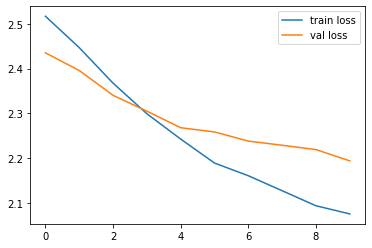

<Figure size 432x288 with 0 Axes>

In [42]:
# loss
import matplotlib.pyplot as plt
plt.plot(without_premodel.history['loss'], label='train loss')
plt.plot(without_premodel.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_new')


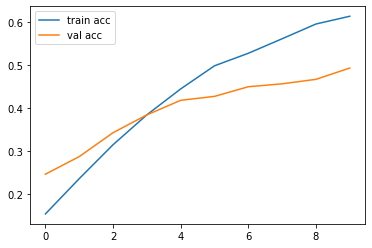

<Figure size 432x288 with 0 Axes>

In [43]:
# accuracies
plt.plot(without_premodel.history['accuracy'], label='train acc')
plt.plot(without_premodel.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_new')

In [44]:
model.save('landmark-recognition-new.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: landmark-recognition-new.model/assets


In [47]:
trained_model = tf.keras.models.load_model('landmark-recognition-new.model')